# Основы визуализации данных с помощью Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык визуализации данных с помощью простых графиков matplotlib. Научиться использовать визуализацию данных для проверки гипотез и валидации данных

### Описание домашнего задания и формат сдачи

Вам предстоит выполнить задачи по визуализации данных. Для этого  впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку преподавателю.

**Важно учесть:** У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Критерии оценки

**"Зачет"** - выполнены задачи 1-9, каждый график отформатирован и читаем

**"На доработку"** - выполнены не все обязательные задачи или какой-либо из график не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Загрузка данных

In [90]:
df = pd.read_csv('vgsales.csv')
df['Year'] = df['Year'].fillna(0).astype(np.int16)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте гистограмму распределения объема продаж всех игр в Японии

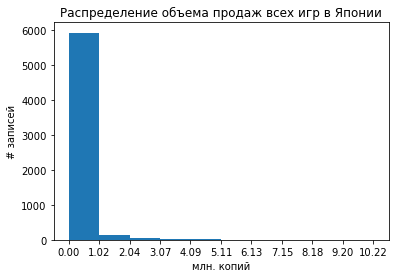

In [29]:
### YOUR CODE HERE ###
bins_count = 10
bins_width = df['JP_Sales'].max() / bins_count
x_range = [i * bins_width for i in range(bins_count +1)]

plt.hist(df[df['JP_Sales'] > 0]['JP_Sales'], bins=bins_count)

plt.title('Распределение объема продаж всех игр в Японии')
plt.xlabel('млн. копий')
plt.ylabel('# записей')
plt.xticks(x_range)
plt.show()
# plt.hist((df[df['JP_Sales'] > 0]['JP_Sales']))

### Задача 2

Постройте столбчатую диаграмму (barchart), показывающую сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах

Text(0, 0.5, 'млн. копий')

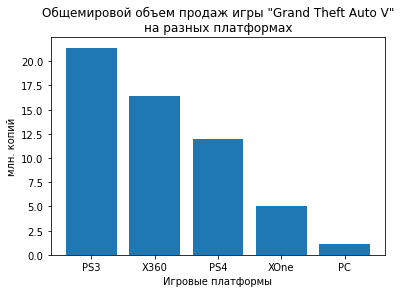

In [37]:
### YOUR CODE HERE ###
df1 = df[df['Name'] == 'Grand Theft Auto V']

plt.bar(x=df1['Platform'], height=df1['Global_Sales'])

plt.title('Общемировой объем продаж игры "Grand Theft Auto V"\nна разных платформах')
plt.xlabel('Игровые платформы')
plt.ylabel('млн. копий')

### Задача 3

Постройте линейный график динамики суммарных общемировых продаж всех игр по годам

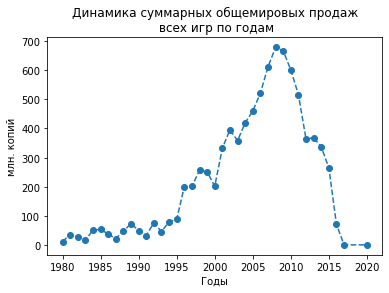

In [170]:
### YOUR CODE HERE ###
df1 = df[df['Year'].ne(0)].groupby('Year')['Global_Sales'].sum()

# df1 = df[df['Name'] == 'Grand Theft Auto V'].groupby('Year')['Global_Sales'].sum()
plt.figure()
plt.plot(df1, 'o--')
plt.title('Динамика суммарных общемировых продаж\n всех игр по годам')
plt.xlabel('Годы')
# plt.xticks(df1.index)
plt.ylabel('млн. копий')
plt.show()

### Задача 4

Постройте точечную диаграмму, показывающую существование зависимости продаж во всем мире от продаж в Северной Америке

(0.0, 82.69999999999999)

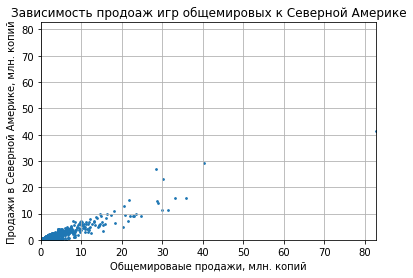

In [216]:
### YOUR CODE HERE ###

fig, ax = plt.subplots()

ax.scatter(df['Global_Sales'], df['NA_Sales'], s=3)

ax.set_title('Зависимость продоаж игр общемировых к Северной Америке')
ax.set_xlabel('Общемироваые продажи, млн. копий')
ax.set_ylabel('Продажи в Северной Америке, млн. копий')
ax.grid(True)

lim = np.round((df['Global_Sales'].max() / 100), 3) * 100

ax.set_ylim(0, lim)
ax.set_xlim(0, lim)


### Задача 5

Постройте круговую диаграмму процентного соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире. Подпишите доли графика с точностью 1 знак после запятой.

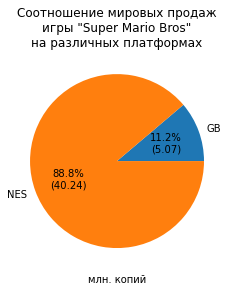

In [239]:
### YOUR CODE HERE ###
df1 = df[df['Name'].eq('Super Mario Bros.')].groupby('Platform')['Global_Sales'].sum()
df1

plt.pie(df1, labels=df1.index, autopct=lambda x: f'{x:.1f}%\n({x * df1.sum() / 100:.2f})')
plt.title('Соотношение мировых продаж\nигры "Super Mario Bros"\nна различных платформах')
plt.xlabel('млн. копий')
plt.show()

### Задача 6

Определите 5 издателей, имеющих наибольшие суммарные продажи во всем мире в 2013 году и проиллюстрируйте величину их продаж на столбчатой гистограмме

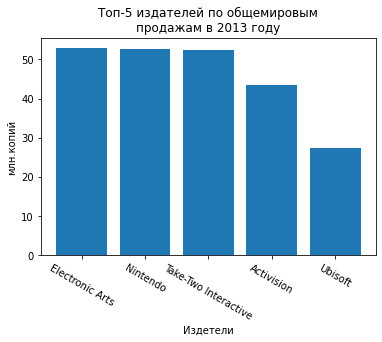

In [256]:
### YOUR CODE HERE ###
df1 = df[df['Year'].eq(2013)].groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)
# df1

plt.bar(df1.index, df1.values, )
plt.title('Топ-5 издателей по общемировым\nпродажам в 2013 году')
plt.xlabel('Издетели')
plt.ylabel('млн.копий')
plt.xticks(rotation=-30)
plt.show()

### Задача 7

Постройте гистограмму распределения величины общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно. Гистограмма для большей точности должна содержать 20 столбцов, отсечки на оси X должны соответствовать границам столбцов.

In [275]:
df1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


In [285]:
df1[df1['Global_Sales'].ge(70)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


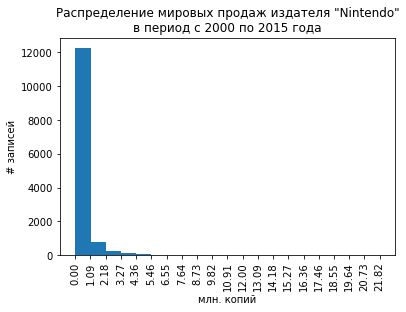

In [286]:
### YOUR CODE HERE ###
df1 = df[(df['Year'].ge(2000) & (df['Year'].le(2015)) & (df['Publisher'].ne('Nintendo')))]
# np.sort(df1['Year'].unique())
# df1
bins_count = 20
bins_width = df1['Global_Sales'].max() / bins_count
x_range = [i*bins_width for i in range(bins_count+1)]

plt.hist(df1['Global_Sales'], bins=bins_count)
plt.title('Распределение мировых продаж издателя "Nintendo"\nв период с 2000 по 2015 года')
plt.xlabel('млн. копий')
plt.ylabel('# записей')
plt.xticks(x_range, rotation=90)
plt.show()


### Задача 8

Постройте линейный график динамики суммарных мировых продаж игр жанра "Action" по годам

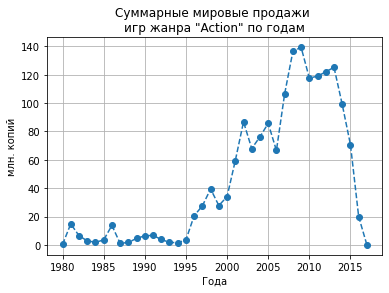

In [299]:
### YOUR CODE HERE ###
df1 = df[df['Genre'].eq('Action')]\
    .groupby('Year')['Global_Sales'].sum()\
    .loc[lambda x: x.index>0].to_frame()
# df1

plt.plot(df1, 'o--')
plt.title('Суммарные мировые продажи \nигр жанра "Action" по годам')
plt.xlabel('Года')
plt.ylabel('млн. копий')
plt.grid(True)

### Задача 9

С помощью столбчатой диаграммы проиллюстрируйте объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра. Столбцы расположите по убыванию.

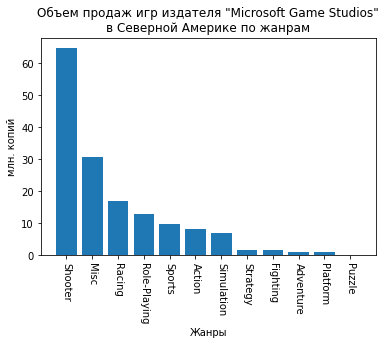

In [309]:
### YOUR CODE HERE ###
df1 = df[df['Publisher'].eq('Microsoft Game Studios')].groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False).to_frame()
df1

plt.bar(x=df1.index, height=df1.NA_Sales)
plt.title('Объем продаж игр издателя "Microsoft Game Studios"\nв Северной Америке по жанрам')
plt.xlabel('Жанры')
plt.ylabel('млн. копий')
plt.xticks(rotation=-90)
plt.show()

## Дополнительные (необязательные) задачи

### Задача 10

Одной из основных задач при анализе данных является проверка данных на корректность и отсутствие ошибок. В датасете "vgsales" одним из потенциальных источников ошибок является столбец с общемировыми продажами. По идее, значение общемировых продаж какой-либо игры должно равняться сумме продаж в Северной Америке, Европе, Японии и остальных странах, в противном случае мы получим ошибку в данных, которая может негативно повлиять на весь дальнейший процесс анализа.

Причин возникновения такой ошибки может быть несколько. Давайте рассмотрим следующие причины:
1. Ошибка округления. В целом, такая ошибка достаточно часто встречается при переводе величин из одних единиц в другие (например, из тысяч копий в миллионы копий).
1. Ошибка вычислений. Такая ситуация требует более серьезного исследования, поскольку она может привести к недостоверным результатам анализа данных.

Будем считать, что в записи имеется ошибка суммирования, если сумма продаж какой-либо игры в Северной Америке, Европе, Японии и остальных странах отличается от общемировых продаж более, чем на 0.01 млн копий.

С помощью круговой диаграммы проиллюстрируйте процент записей в датасете, имеющих такую ошибку суммирования продаж.

In [323]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,29.01
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,28.61
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,28.31


In [358]:
### YOUR CODE HERE ###
df['Total_Sales'] = df.loc[:, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1).apply(lambda x: np.round(x, 2))


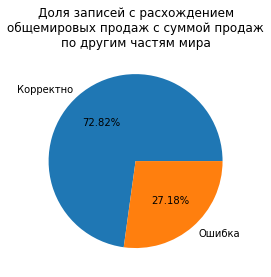

In [361]:
df1 = (df['Global_Sales'] == df['Total_Sales']).value_counts()\
    .rename(index = {True: 'Корректно', False: 'Ошибка'})

plt.pie(df1.values, labels=df1.index, autopct='%.2f%%')
plt.title('Доля записей с расхождением\nобщемировых продаж с суммой продаж\nпо другим частям мира')
plt.show()

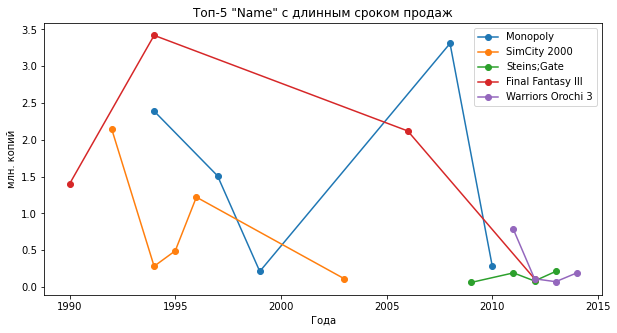

In [167]:
by_col = 'Name'
df1 = df[df['Year'].ne(0)].groupby([by_col,'Year'])['Global_Sales'].sum().reset_index()
long_sales = df1.value_counts(by_col).head(5).index
plt.figure(figsize=(10,5))
for game in long_sales:
    df_tmp = df1[df1[by_col].eq(game)].set_index('Year')['Global_Sales']
    # print(df_tmp)
    plt.plot(df_tmp, 'o-',label=game)
plt.title(f'Топ-5 "{by_col}" с длинным сроком продаж')
plt.xlabel('Года')
plt.ylabel('млн. копий')
# plt.xticks(df1['Year'].unique())
plt.legend(loc='upper right')
plt.show()


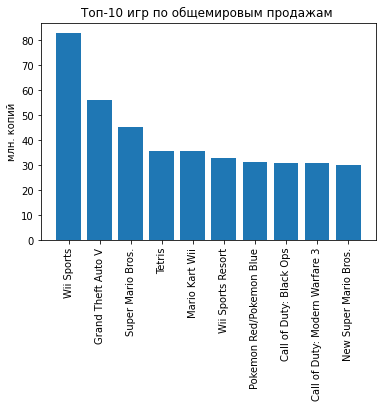

In [183]:
df1 = df.groupby(['Name'])['Global_Sales'].sum().reset_index().sort_values('Global_Sales', ascending = False).head(10)

plt.bar(x=df1['Name'], height=df1['Global_Sales'],)
plt.title('Топ-10 игр по общемировым продажам ')
plt.xticks(rotation=90)
plt.ylabel('млн. копий')
plt.show()